### KNN And SVM Should be used on smaller datasets >1000

## KNN
### K-Nearest Neighbors


In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Target Feature Drug

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.shape

(200, 6)

In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X and Y

In [9]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]


In [10]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


<Axes: xlabel='Drug'>

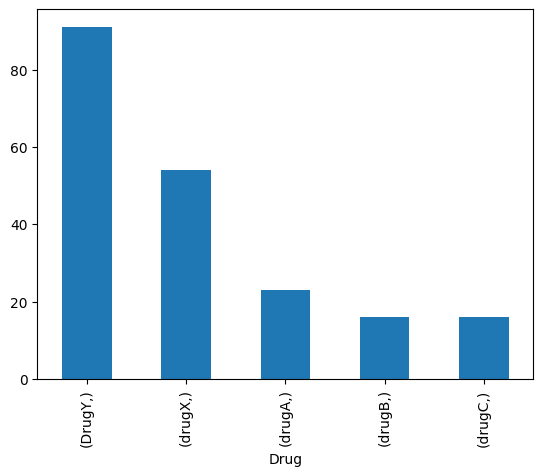

In [12]:
Y.value_counts().plot(kind="bar")

### Step 4 - Preprocessing on X

In [13]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [27]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore" ,sparse_output =False)
)

In [28]:
pre1 = ColumnTransformer (
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")


In [29]:
X_pre = pre1.fit_transform(X)
X_pre.head()


,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=42)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30)
model.fit(xtrain, ytrain)


KNeighborsClassifier(n_neighbors=30)

In [42]:
model.score(xtrain,ytrain)

0.7583333333333333

In [43]:
model.score(xtest, ytest)

0.75

In [ ]:
params = {
    "n_neigbors"
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV()



## SVM

In [45]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)

svm_model.fit(xtrain, ytrain)

SVC(probability=True)

In [46]:
svm_model.score(xtrain, ytrain)

0.9833333333333333

In [47]:
svm_model.score(xtest, ytest)

0.925

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, xtrain, ytrain, cv=5, scoring="f1_macro")

In [50]:
scores.mean()

np.float64(0.870970826275174)

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

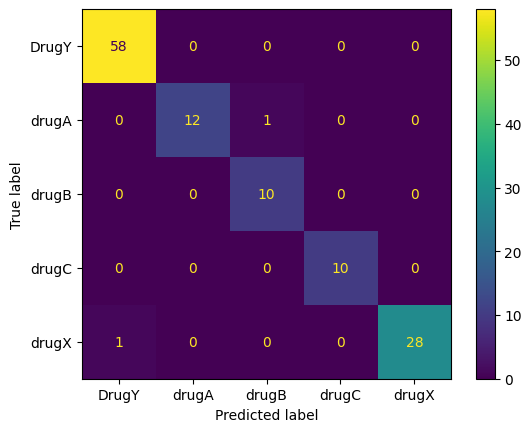

In [55]:
ConfusionMatrixDisplay.from_estimator(svm_model, xtrain, ytrain)

In [59]:
ypred = svm_model.predict(xtest)

In [60]:
xnew = pd.read_csv("Drugs_test.csv")

In [64]:
xnew_pre = pre1.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-0.208816,-0.568573,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.208816,-0.767015,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.457407,0.292090,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.412661,-0.352929,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.581703,0.681650,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [65]:
preds = svm_model.predict(xnew_pre)

In [68]:
xnew_pre.shape

(50, 9)